In [33]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pylab as pl
import matplotlib.cm as cm
import matplotlib.patches as mpatches
from matplotlib import cm
from matplotlib.colors import ListedColormap, BoundaryNorm
from numpy import nan
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.impute import SimpleImputer
from sklearn.metrics import classification_report, confusion_matrix
from pandas import read_csv

In [34]:
df = pd.read_csv('https://raw.githubusercontent.com/specolombiahackathon/202104/main/AVANZADO/adv_train_data.csv')
dt = pd.read_csv('https://raw.githubusercontent.com/specolombiahackathon/202104/main/AVANZADO/adv_test_data.csv')
df.fillna(df.mean(), inplace=True)
dt.fillna(df.mean(), inplace=True)
# count the number of NaN values in each column
print('NaN - Training data')
print(df.isnull().sum())
print(df.shape)
print('NaN - Test data')
print(dt.isnull().sum())
df.fillna(df.mean(), inplace=True)
dt.fillna(df.mean(), inplace=True)
df['FLUIDTYPE'] = df['FLUIDTYPE'].fillna("")
df['RECOVERY'] = df['RECOVERY'].fillna("")
dt['FLUIDTYPE'] = dt['FLUIDTYPE'].fillna("")
dt['RECOVERY'] = dt['RECOVERY'].fillna("")
# summarize the shape of the data with missing rows removed
print(dt.shape)

NaN - Training data
CASENAME                 0
Depth                    0
Area                     0
RESTHICK                 0
PRESS                    0
TEMP                     0
OILGRAV                  0
SOLGOR                   0
Visco                    0
Psat                     0
Bo                       0
FLUIDTYPE               14
WATSAL                   0
Aquifer                 53
POROSITY                 0
NTG                      0
PERM                     0
CONWATER                 0
PERM.AQUIFER             0
OOIP                     0
RF                       0
RFmax                    0
Np                       0
Nw                       0
Ng                       0
Nwi                      0
GOR                      0
SWx                      0
RELPERM.RESSAT.Kro       0
RELPERM.ENDPOINT.Kro     0
RELPERM.ENDPOINT.Krw     0
RELPERM.EXPON.Kro        0
RELPERM.EXPON.Krw        0
PROD.PI                  0
WINJ.PI                  0
PROD_TIME                0
Field.OI

In [35]:

df.describe()

,Depth,Area,RESTHICK,PRESS,TEMP,OILGRAV,SOLGOR,Visco,Psat,Bo,...,WINJ.PI,PROD_TIME,Field.OILRATE,Field.WATRATE,Field.GASRATE,Field.INJWATRATE,Field.INJGASRATE,NumPROD,NumWINJ,BODP_well
count,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,...,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000
mean,6562.675000,20.429782,217.232500,3629.669632,175.907243,28.241550,347.549148,38.246941,1588.189840,1.126175,...,8.780781,33.162125,52979.790026,62122.823219,25.671642,40683.166904,2357.945736,18.025099,9.332857,49129.345559
std,3162.350814,8.721017,100.344331,1509.719497,43.350656,9.382178,421.238589,185.742847,1308.424258,0.142718,...,10.871245,16.263394,46286.574400,96355.551004,96.616397,57437.182113,9678.361697,26.955638,24.006607,25753.783002
min,1010.000000,2.600000,30.000000,770.000000,89.000000,11.500000,0.000000,0.200000,5.000000,1.016000,...,0.000000,5.000000,2000.000000,0.000000,0.000000,0.000000,0.000000,4.000000,0.000000,1048.205790
25%,3777.500000,13.900000,140.000000,2357.500000,140.750000,20.100000,100.000000,1.100000,683.500000,1.048000,...,5.000000,18.775000,21375.000000,3675.000000,0.000000,0.000000,0.000000,7.000000,0.000000,31990.207861
50%,6740.000000,19.700000,206.000000,3630.000000,176.000000,27.850000,210.000000,3.600000,1309.000000,1.075000,...,8.780781,33.550000,40000.000000,30400.000000,0.000000,24100.000000,0.000000,11.000000,2.000000,49129.345559
75%,9392.500000,26.300000,285.250000,4870.000000,213.000000,35.900000,390.000000,17.600000,2015.750000,1.137225,...,8.780781,47.325000,69125.000000,70100.000000,25.671642,54475.000000,2357.945736,18.025099,9.332857,57032.268799
max,11990.000000,43.300000,486.000000,9710.000000,267.000000,48.800000,3870.000000,3900.500000,8815.000000,1.943000,...,188.000000,60.000000,334100.000000,890200.000000,1800.000000,380100.000000,129800.000000,453.000000,335.000000,129040.991108


In [36]:
print(df['FLUIDTYPE'].unique())
print(df.groupby('FLUIDTYPE').size())

['Undersaturated' 'Near Saturation' 'Highly Undersaturated'
 'Full Saturated' '' 'Very Highly Undersaturated']
FLUIDTYPE
                               14
Full Saturated                 22
Highly Undersaturated         148
Near Saturation               180
Undersaturated                418
Very Highly Undersaturated     18
dtype: int64


In [37]:
conditions = [
    (df['FLUIDTYPE'] == 'Undersaturated'),
    (df['FLUIDTYPE'] ==  'Near Saturation'),
    (df['FLUIDTYPE'] ==  'Highly Undersaturated'),
    (df['FLUIDTYPE'] ==  'Full Saturated'), 
    (df['FLUIDTYPE'] == 'Very Highly Undersaturated')
    ]
values = [1, 2, 3, 4, 5]
df['fluido'] = np.select(conditions, values)


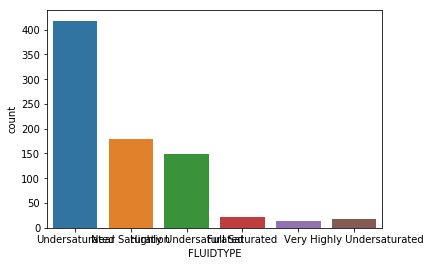

In [38]:
sns.countplot(df['FLUIDTYPE'],label='Fluido')
plt.show()


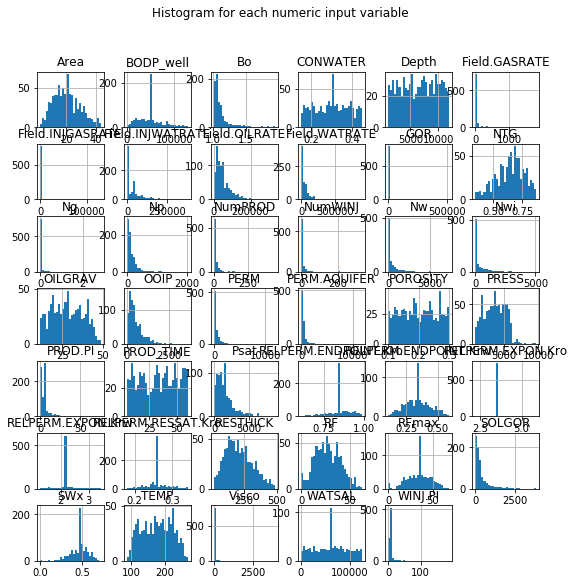

In [42]:
df.drop('fluido', axis=1).hist(bins=30, figsize=(9,9))
pl.suptitle("Histogram for each numeric input variable")
plt.savefig('field_hist')
plt.show()

In [43]:
feature_names = ['OILGRAV', 'PRESS', 'SOLGOR', 'Field.OILRATE', 'Field.WATRATE', 'Field.GASRATE','Field.INJWATRATE', 'Field.INJGASRATE']
X = df[feature_names]
y = df['FLUIDTYPE']


In [44]:
X_train = X
y_train = y
X_test = dt[feature_names]
y_test = dt['FLUIDTYPE']

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

In [45]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [46]:
clf = DecisionTreeClassifier().fit(X_train, y_train)
print('Accuracy of Decision Tree classifier on training set: {:.2f}'
     .format(clf.score(X_train, y_train)))
print('Accuracy of Decision Tree classifier on test set: {:.2f}'
     .format(clf.score(X_test, y_test)))
y_pred = clf.predict(X_test)
print(y_pred)

Accuracy of Decision Tree classifier on training set: 1.00
Accuracy of Decision Tree classifier on test set: 0.02
['Undersaturated' 'Undersaturated' 'Near Saturation' 'Undersaturated'
 'Near Saturation' 'Undersaturated' 'Highly Undersaturated'
 'Near Saturation' 'Highly Undersaturated' 'Very Highly Undersaturated'
 'Near Saturation' 'Near Saturation' 'Undersaturated' 'Undersaturated'
 'Undersaturated' 'Full Saturated' 'Highly Undersaturated'
 'Near Saturation' 'Undersaturated' 'Undersaturated' 'Undersaturated'
 'Undersaturated' 'Undersaturated' 'Undersaturated' 'Near Saturation'
 'Undersaturated' 'Near Saturation' 'Undersaturated' 'Undersaturated'
 'Undersaturated' 'Highly Undersaturated' 'Undersaturated'
 'Undersaturated' 'Undersaturated' 'Undersaturated' 'Undersaturated'
 'Highly Undersaturated' 'Undersaturated' 'Highly Undersaturated' ''
 'Undersaturated' 'Undersaturated' 'Undersaturated' 'Near Saturation'
 'Undersaturated' 'Undersaturated' 'Undersaturated'
 'Highly Undersaturated' 

In [49]:
dt['FLUIDTYPE']=y_pred 
dt.to_csv('JUAN_CEBALLOS_FLUIDOS_v00.csv', index=False)

In [47]:
model = LinearDiscriminantAnalysis()
# define the model evaluation procedure
cv = KFold(n_splits=3, shuffle=True, random_state=1)
# evaluate the model
result = cross_val_score(model, X, y, cv=cv, scoring='accuracy')
# report the mean performance
print('Accuracy: %.3f' % result.mean())

Accuracy: 0.584


In [25]:
classifier = KNeighborsClassifier(n_neighbors=6)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
print('Accuracy of K-NN classifier on training set: {:.2f}'
     .format(classifier.score(X_train, y_train)))
print('Accuracy of K-NN classifier on test set: {:.2f}'
     .format(classifier.score(X_test, y_test)))

[[ 0  0  0  1  3  0]
 [ 0  1  0  2  0  0]
 [ 0  1 13  0 20  0]
 [ 0  0  2 18 14  0]
 [ 0  0  9  5 67  0]
 [ 0  0  1  0  3  0]]
                            precision    recall  f1-score   support

                                 0.00      0.00      0.00         4
            Full Saturated       0.50      0.33      0.40         3
     Highly Undersaturated       0.52      0.38      0.44        34
           Near Saturation       0.69      0.53      0.60        34
            Undersaturated       0.63      0.83      0.71        81
Very Highly Undersaturated       0.00      0.00      0.00         4

                  accuracy                           0.62       160
                 macro avg       0.39      0.35      0.36       160
              weighted avg       0.58      0.62      0.59       160

Accuracy of K-NN classifier on training set: 0.72
Accuracy of K-NN classifier on test set: 0.62
/Applications/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: Un

Text(0, 0.5, 'Mean Error')

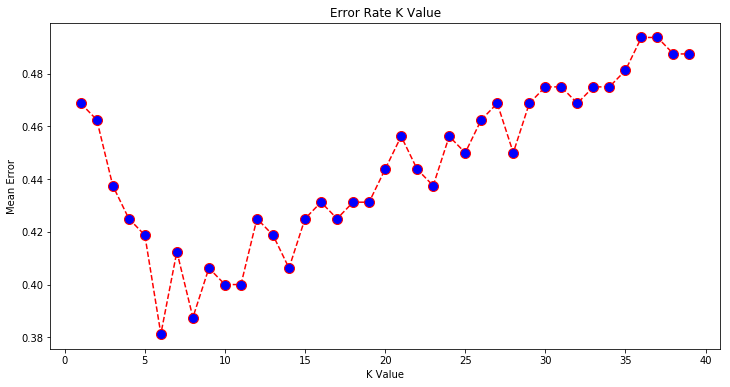

In [26]:
error = []
# Calculating error for K values between 1 and 40
for i in range(1, 40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    error.append(np.mean(pred_i != y_test))
plt.figure(figsize=(12, 6))
plt.plot(range(1, 40), error, color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
plt.title('Error Rate K Value')
plt.xlabel('K Value')
plt.ylabel('Mean Error')


In [27]:
svm = SVC()
svm.fit(X_train, y_train)
print('Accuracy of SVM classifier on training set: {:.2f}'
     .format(svm.score(X_train, y_train)))
print('Accuracy of SVM classifier on test set: {:.2f}'
     .format(svm.score(X_test, y_test)))

Accuracy of SVM classifier on training set: 0.71
Accuracy of SVM classifier on test set: 0.64


In [28]:
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
print('Accuracy of Logistic regression classifier on training set: {:.2f}'
     .format(logreg.score(X_train, y_train)))
print('Accuracy of Logistic regression classifier on test set: {:.2f}'
     .format(logreg.score(X_test, y_test)))

Accuracy of Logistic regression classifier on training set: 0.66
Accuracy of Logistic regression classifier on test set: 0.59
/Applications/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Applications/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


In [29]:
lda = LinearDiscriminantAnalysis()
lda.fit(X_train, y_train)
print('Accuracy of LDA classifier on training set: {:.2f}'
     .format(lda.score(X_train, y_train)))
print('Accuracy of LDA classifier on test set: {:.2f}'
     .format(lda.score(X_test, y_test)))

Accuracy of LDA classifier on training set: 0.61
Accuracy of LDA classifier on test set: 0.56


In [30]:
gnb = GaussianNB()
gnb.fit(X_train, y_train)
print('Accuracy of GNB classifier on training set: {:.2f}'
     .format(gnb.score(X_train, y_train)))
print('Accuracy of GNB classifier on test set: {:.2f}'
     .format(gnb.score(X_test, y_test)))

Accuracy of GNB classifier on training set: 0.37
Accuracy of GNB classifier on test set: 0.38
